<a href="https://colab.research.google.com/github/jjaquezrd/predicciones-de-ventas-alimenticias/blob/main/predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##predicciones de ventas alimenticias

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
file_name = '/content/drive/MyDrive/Data_Science/DataSet/sales_predictions.csv'
df = pd.read_csv(file_name)


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) ¿Cuántas filas y columnas?

In [16]:
df.shape

(8523, 12)

# 2) ¿Cuáles son los tipos de datos en cada variable?

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [18]:
df.duplicated().sum()

0

Segun el resultado planteado mas arriba, no se muestran filas o registros duplicados

# 4) Identifiquen los valores faltantes.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se identifican valores faltantes para las columnas "Item_Weight" y "Outlet_Size"

# 5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

Para los valores faltantes de la columna Item_Weight, en primera instancia se procedio a identificar y agrupar por "Item_identifier" cada producto con el fin de determinar si el mismo se encuentra presente en otro comercio y con los datos completos

Agrupacion por Item Identifier cuando el Item_Weight esta vacio

In [20]:
peso_null_filter = df['Item_Weight'].isna()
df[peso_null_filter].groupby('Item_Identifier')['Item_Identifier'].count()

Item_Identifier
DRA24    2
DRA59    2
DRB01    1
DRB25    1
DRB48    1
        ..
NCZ17    1
NCZ18    1
NCZ30    1
NCZ53    1
NCZ54    2
Name: Item_Identifier, Length: 1142, dtype: int64

Agrupacion por Item Identifier cuando el Item_Weight no esta vacio

In [21]:
peso_null_filter = df['Item_Weight'].isna()==False
df[peso_null_filter].groupby('Item_Identifier')['Item_Identifier'].count()

Item_Identifier
DRA12    6
DRA24    5
DRA59    6
DRB01    2
DRB13    5
        ..
NCZ30    6
NCZ41    5
NCZ42    5
NCZ53    4
NCZ54    5
Name: Item_Identifier, Length: 1555, dtype: int64

Como resultado se puede comprobar la hipotesis de que existen productos existentes en ambos grupos (Item_weight vacio y viseversa). Por lo que se procedera a completar los datos vacios usando la informacion del mismo Item_Identifier que le corresponda.

In [22]:
def update_Item_Weight(Item_Identifier):
  #aplica filtro para localizar el identificador
  Item_Identifier_filter = df['Item_Identifier']== Item_Identifier
  #obten el valor minimo del identificador filtrado
  Valor_min = df[Item_Identifier_filter]['Item_Weight'].min()
  return Valor_min
  

In [23]:
#crea filtro para los productos que tengan el peso vacio
peso_null_filter = df['Item_Weight'].isna()
#se aplica funcion para actualizar la columna del peso siempre y cuando este vacia.
df.loc[peso_null_filter,'Item_Weight']= df.apply(lambda x:update_Item_Weight(x['Item_Identifier']), axis=1)
peso_null_filter = df['Item_Weight'].isna()

Luego de ejecutado el proceso de llenado de datos, se presentan 4 registros con valores vacios. Debido a que este numero no es representativo, y para evitar elminar estas filas de la muestra, se procede a completar con 0 el valor.

In [24]:
df[peso_null_filter].groupby('Item_Identifier')['Item_Identifier'].count()

Item_Identifier
FDE52    1
FDK57    1
FDN52    1
FDQ60    1
Name: Item_Identifier, dtype: int64

In [25]:
df['Item_Weight']=df['Item_Weight'].fillna(0.00)

Comprobando la no existencia de valores nulos para la columna Item_Weight

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Tratamiento para la columna Outlet_Size: para este punto se procedio a verificar el detalle de los comercios con el valor faltante, para verificar el impacto. Se agrupo la data por Outlet_Idenfifier, Outlet_Type, Outlet_Location_Type, con el fin de tener contexto de la informacion

In [27]:
filtro_Outlet_size_na = df['Outlet_Identifier']
filtro_size_na = df['Outlet_Size'].isna()
df[filtro_size_na].groupby(['Outlet_Identifier','Outlet_Type', 'Outlet_Location_Type'])['Outlet_Identifier'].count()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT010             Grocery Store      Tier 3                  555
OUT017             Supermarket Type1  Tier 2                  926
OUT045             Supermarket Type1  Tier 2                  929
Name: Outlet_Identifier, dtype: int64

Se identifica que solo tres comercios representan el impacto de los valores nulos en esta columna. Se procede a verificar los comercios con valores no nulos con el proposito de obtener contexto e identificar el patron

In [28]:
df.groupby(['Outlet_Type','Outlet_Size','Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Type        Outlet_Size  Outlet_Location_Type
Grocery Store      Small        Tier 1                  528
Supermarket Type1  High         Tier 3                  932
                   Medium       Tier 1                  930
                   Small        Tier 1                  930
                                Tier 2                  930
Supermarket Type2  Medium       Tier 3                  928
Supermarket Type3  Medium       Tier 3                  935
Name: Outlet_Size, dtype: int64

Visto los datos mas arriba, se puede deducir que colocar "Small" para los tres comercios que representan valores nulos, no representa mayor riesgo para el ejercicio y los resultados finales. Segun la muestra se observa que para el Segmento Grocery Store, en el universo la generalidad es que sean de tamano Small. Mientras que para los Supermercados Tipo 1, aunque existen tres categorias, valiendonos de la columna Outlet_Location_Type, no existe en el universo de los datos la combinacion Supermercado Tipo 1 + Tier 2 como es nuestro caso, por lo que procederemos a completar como Small.

In [29]:
OutletIdentifier_filter = df['Outlet_Identifier']=='OUT010'
df.loc[OutletIdentifier_filter,'Outlet_Size']= "Small"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6668 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
OutletIdentifier_filter = df['Outlet_Identifier']=='OUT017'
df.loc[OutletIdentifier_filter,'Outlet_Size']= "Small"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                7594 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
OutletIdentifier_filter = df['Outlet_Identifier']=='OUT045'
df.loc[OutletIdentifier_filter,'Outlet_Size']= "Small"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 6) Confirmen que no hay valores faltantes después de abordarlos.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

Se procedio a actualizar los valores para todos las columnas identificadas con el tipo de datos "Object". Se comprueba que el tipo de datos adecuado es el String. Se realizo confirmacion visual y muestreo aleatorio de datos.

In [33]:
df = df.convert_dtypes()
df.dtypes

Item_Identifier               string
Item_Weight                  Float64
Item_Fat_Content              string
Item_Visibility              Float64
Item_Type                     string
Item_MRP                     Float64
Outlet_Identifier             string
Outlet_Establishment_Year      Int64
Outlet_Size                   string
Outlet_Location_Type          string
Outlet_Type                   string
Item_Outlet_Sales            Float64
dtype: object

# 8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [34]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.869378,0.066132,140.992782,1997.831867,2181.288914
std,4.653372,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.01676,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,Small,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Ver el comportamiento de los productos en general utilizando el precio Item_MRP

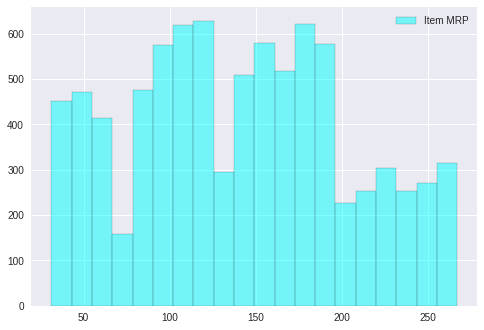

In [36]:
plt.style.use('seaborn')
serie_MRP=df['Item_MRP']
plt.hist(serie_MRP, bins= 20,
         edgecolor='black', facecolor ='aqua', alpha=0.5, label="Item MRP")
plt.legend()
plt.show()

# Verificar los productos vendidos por El tamano de la tienda y los precios

In [37]:
serie_size_Small = df['Outlet_Size']=="Small"
serie_size_medium = df['Outlet_Size']=="Medium"
serie_size_High= df['Outlet_Size']=="High"
df[serie_size_medium]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.01676,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
7,FDP10,19.0,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.25,Low Fat,0.084676,Soft Drinks,263.191,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.865
8511,FDF05,17.5,Low Fat,0.02698,Frozen Foods,262.591,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.856
8515,FDH24,20.7,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.288
8516,NCJ19,18.6,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.882


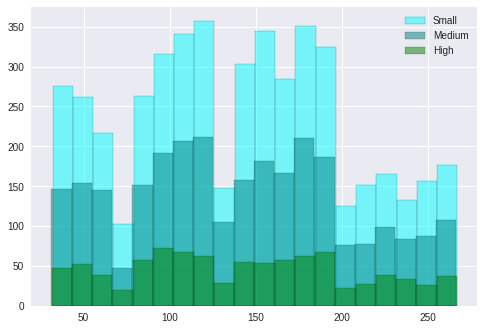

In [38]:
small = df.loc[serie_size_Small, 'Item_MRP']
plt.hist(small,bins= 20,
         edgecolor='black', facecolor ='aqua', alpha=0.5, label="Small")
medium = df.loc[serie_size_medium,'Item_MRP']
plt.hist(medium,bins= 20,
         edgecolor='black', facecolor ='Teal', alpha=0.5, label="Medium")
High = df.loc[serie_size_High, 'Item_MRP']
plt.hist(High,bins= 20,
         edgecolor='black', facecolor ='green', alpha=0.5, label="High")
plt.legend()
plt.show()

La mayor cantidad de productos vendidos se situa en los precios de 100-200 para todos los comercios

# Analisis box plot de los precios de productos por tamano del comercio

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


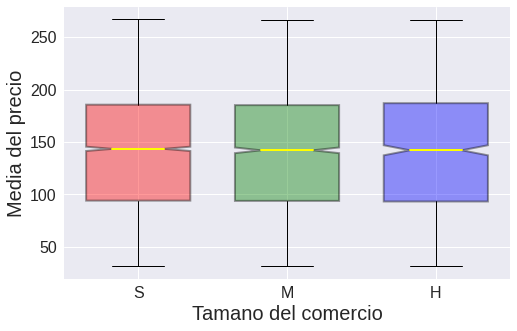

In [39]:
Small_size = df.loc[df['Outlet_Size']=='Small','Item_MRP'].values
Medium_size = df.loc[df['Outlet_Size']=='Medium','Item_MRP'].values
High_size = df.loc[df['Outlet_Size']=='High','Item_MRP'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5));
boxplots = axes.boxplot([Small_size,Medium_size, High_size],
           notch = True,
           labels=['S', 'M', 'H'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0];
boxplot1.set_facecolor('red');
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('green');
plt.xlabel('Tamano del comercio', fontsize = 20);
plt.ylabel('Media del precio', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show();



El resultado del boxplot por el tamano del comercio y el precio de los productos vendidos, muestra que indistintamente del tamano del comercio el precio de los productos mas vendidos se situa entre los 100 y 200. Siendo el promedio aprox. 150. Siendo congruente esto con los resultados arrojados por historigrama de verificacion general de la variable precio del producto.

# Grafico de calor general de la muestra

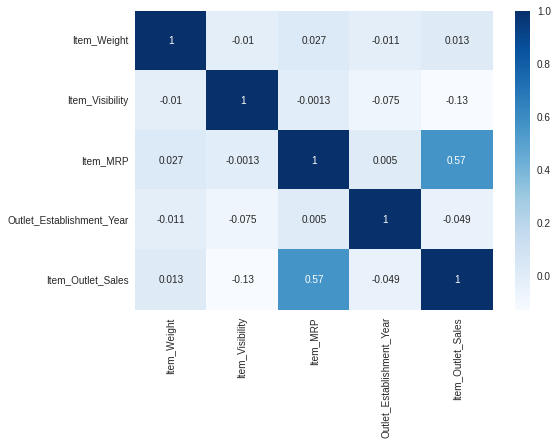

In [40]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues', annot=True)



Se presenta posible relacion moderada entre las ventas y los precios de los productos.

In [86]:
df.groupby(['Outlet_Size', 'Item_Identifier'])['Item_MRP'].mean()

Outlet_Size  Item_Identifier
High         DRA12                142.3154
             DRA24                162.4868
             DRA59                185.9924
             DRB01                 190.953
             DRB13                 189.253
                                   ...    
Small        NCZ30                120.7098
             NCZ41                125.2704
             NCZ42              236.891467
             NCZ53                188.7214
             NCZ54                161.7302
Name: Item_MRP, Length: 3944, dtype: Float64

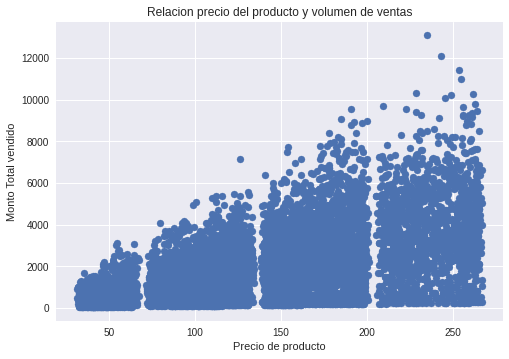

In [103]:
small = df[serie_size_Small]
medium = df[serie_size_medium]
high = df[serie_size_High]
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
#plt.scatter(small['Item_MRP'],small['Item_Outlet_Sales'])
#plt.scatter(medium['Item_MRP'],medium['Item_Outlet_Sales'])
#plt.scatter(high['Item_MRP'],high['Item_Outlet_Sales'])
plt.title('Relacion precio del producto y volumen de ventas')
plt.xlabel('Precio de producto')
plt.ylabel('Monto Total vendido')
plt.show()